In [1]:
# Importamos las librerías que serán necesarias para el proyecto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest



In [2]:
# Visualización del dataset y obtención de información de sus variables
df = pd.read_csv('../data/raw/bank-full.csv', sep=';')

def explore_bank_data (df):
    """
    Carga el dataset de marketing bancario,
    """
    display(df.head())
    df = df.rename(columns={'y': 'fixed_term_deposit'})
    display(df.info())
    display(df.describe().round(2))
    display(df.isnull().sum())
    return df

df = df.rename(columns={'y': 'fixed_term_deposit'})

explore_bank_data(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,fixed_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 45211 non-null  int64 
 1   job                 45211 non-null  object
 2   marital             45211 non-null  object
 3   education           45211 non-null  object
 4   default             45211 non-null  object
 5   balance             45211 non-null  int64 
 6   housing             45211 non-null  object
 7   loan                45211 non-null  object
 8   contact             45211 non-null  object
 9   day                 45211 non-null  int64 
 10  month               45211 non-null  object
 11  duration            45211 non-null  int64 
 12  campaign            45211 non-null  int64 
 13  pdays               45211 non-null  int64 
 14  previous            45211 non-null  int64 
 15  poutcome            45211 non-null  object
 16  fixed_term_deposit  45

None

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


age                   0
job                   0
marital               0
education             0
default               0
balance               0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
fixed_term_deposit    0
dtype: int64

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,fixed_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
"""
Vemos que el dataset obtenido no tiene valores nulos, contiene variables cualitativas y cuantitativas
"""

'\nVemos que el dataset obtenido no tiene valores nulos, contiene variables cualitativas y cuantitativas\n'

## Analizar el comportamiento y distribución de las variables

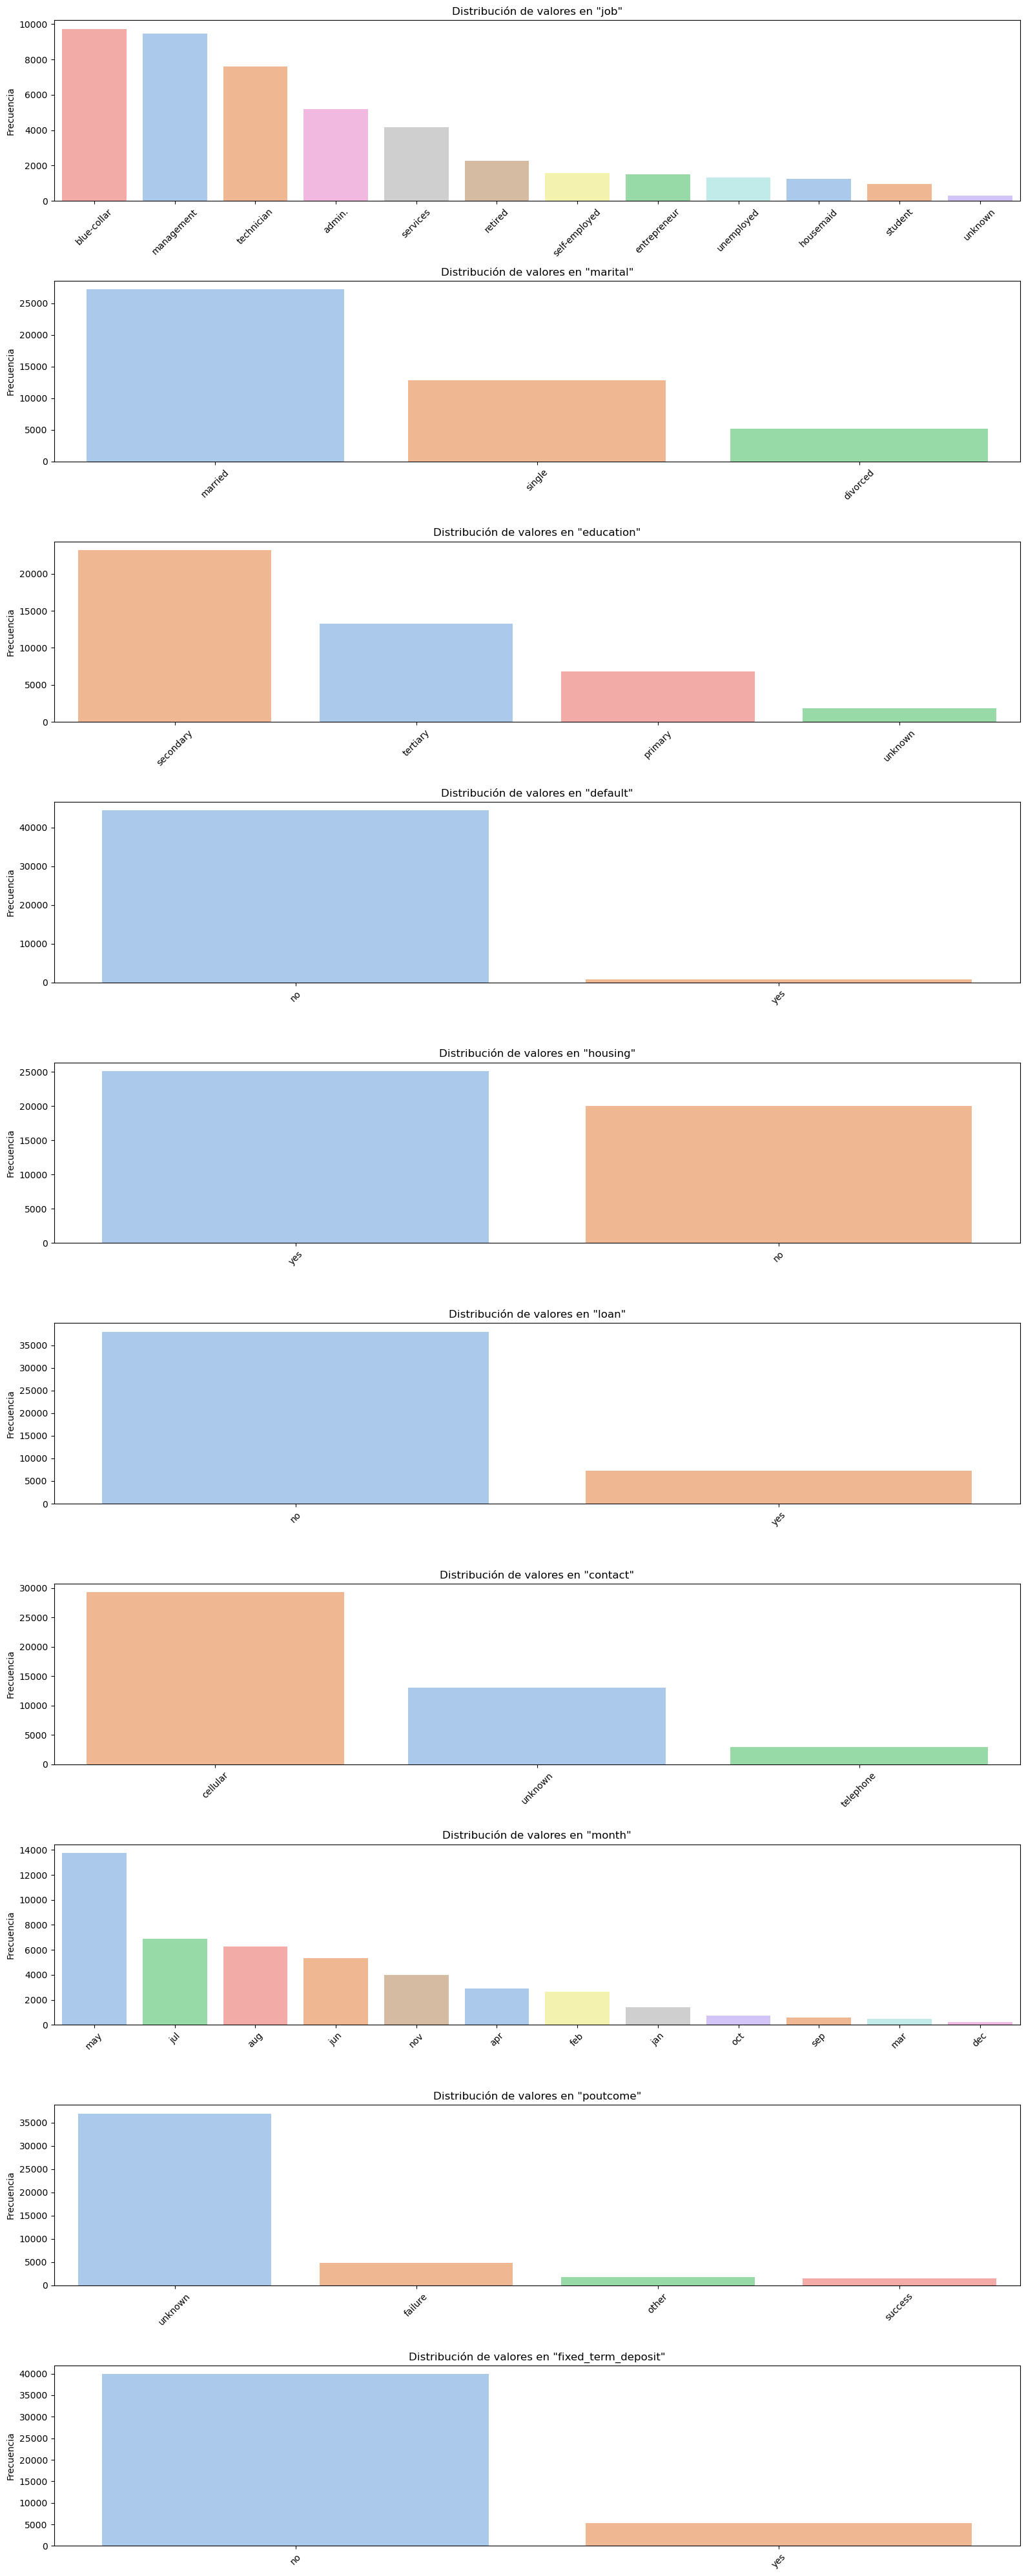

In [6]:
# Funcion para visualizar la distribución de las variables cuantitativas

def plot_categorical_distributions(df):
    """
    Genera una visualización de la distribución de las variables categóricas
    en un DataFrame utilizando countplots de Seaborn.
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:
        print("No se encontraron columnas categóricas en el DataFrame.")
        return

    plt.figure(figsize=(16, len(categorical_cols) * 4))

    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(len(categorical_cols), 1, i)
        sns.countplot(
            data=df,
            x=col,
            hue=col,                
            palette='pastel',
            order=df[col].value_counts().index,
            legend=False            
        )
        plt.title(f'Distribución de valores en "{col}"')
        plt.xlabel('')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_categorical_distributions(df)

Los valores Unknown de studies y job no me aportan información por ello se eliminaran del modelo

In [7]:
total = len(df)
unknowns = (df['job'] == 'unknown').sum()
percentage = round((unknowns / total) * 100, 2)

print(f"'unknown' representa el {percentage}% de los datos.")


'unknown' representa el 0.64% de los datos.


In [8]:
def drop_unknown(df, columns):
    """ 
    Eliminamos los valores unknown de las columnas elegidas
    """

    for col in columns:
        df= df[df[col] != 'unknown']
    return df
    
df = drop_unknown(df, ['job', 'education'])
# df.head()

In [9]:
def map_education_level(df):
    """
    Crea una nueva columna 'education_level' que aclara el nivel de estudios
    a partir de la columna 'education'.
    """
    education_map = {
        'primary': 'Primary',
        'secondary': 'High School/VET',
        'tertiary': 'Grade/Higher VET',
        'unknown': 'unknown'
    }
    
    df['education_level'] = df['education'].map(education_map)
    return df

df = map_education_level(df)
# display(df)

In [10]:
def group_ages(age):
    """ 
    Se encarga de agrupar rango de edades
    """
    if age <=30:
        return '18 - 30'
    elif age > 30 and age <= 45:
        return '31 - 45'
    elif age > 45 and age <= 65:
        return '46 - 65'
    else: 
        return '66+ '
    
df['age_group'] = df['age'].apply(group_ages)
    

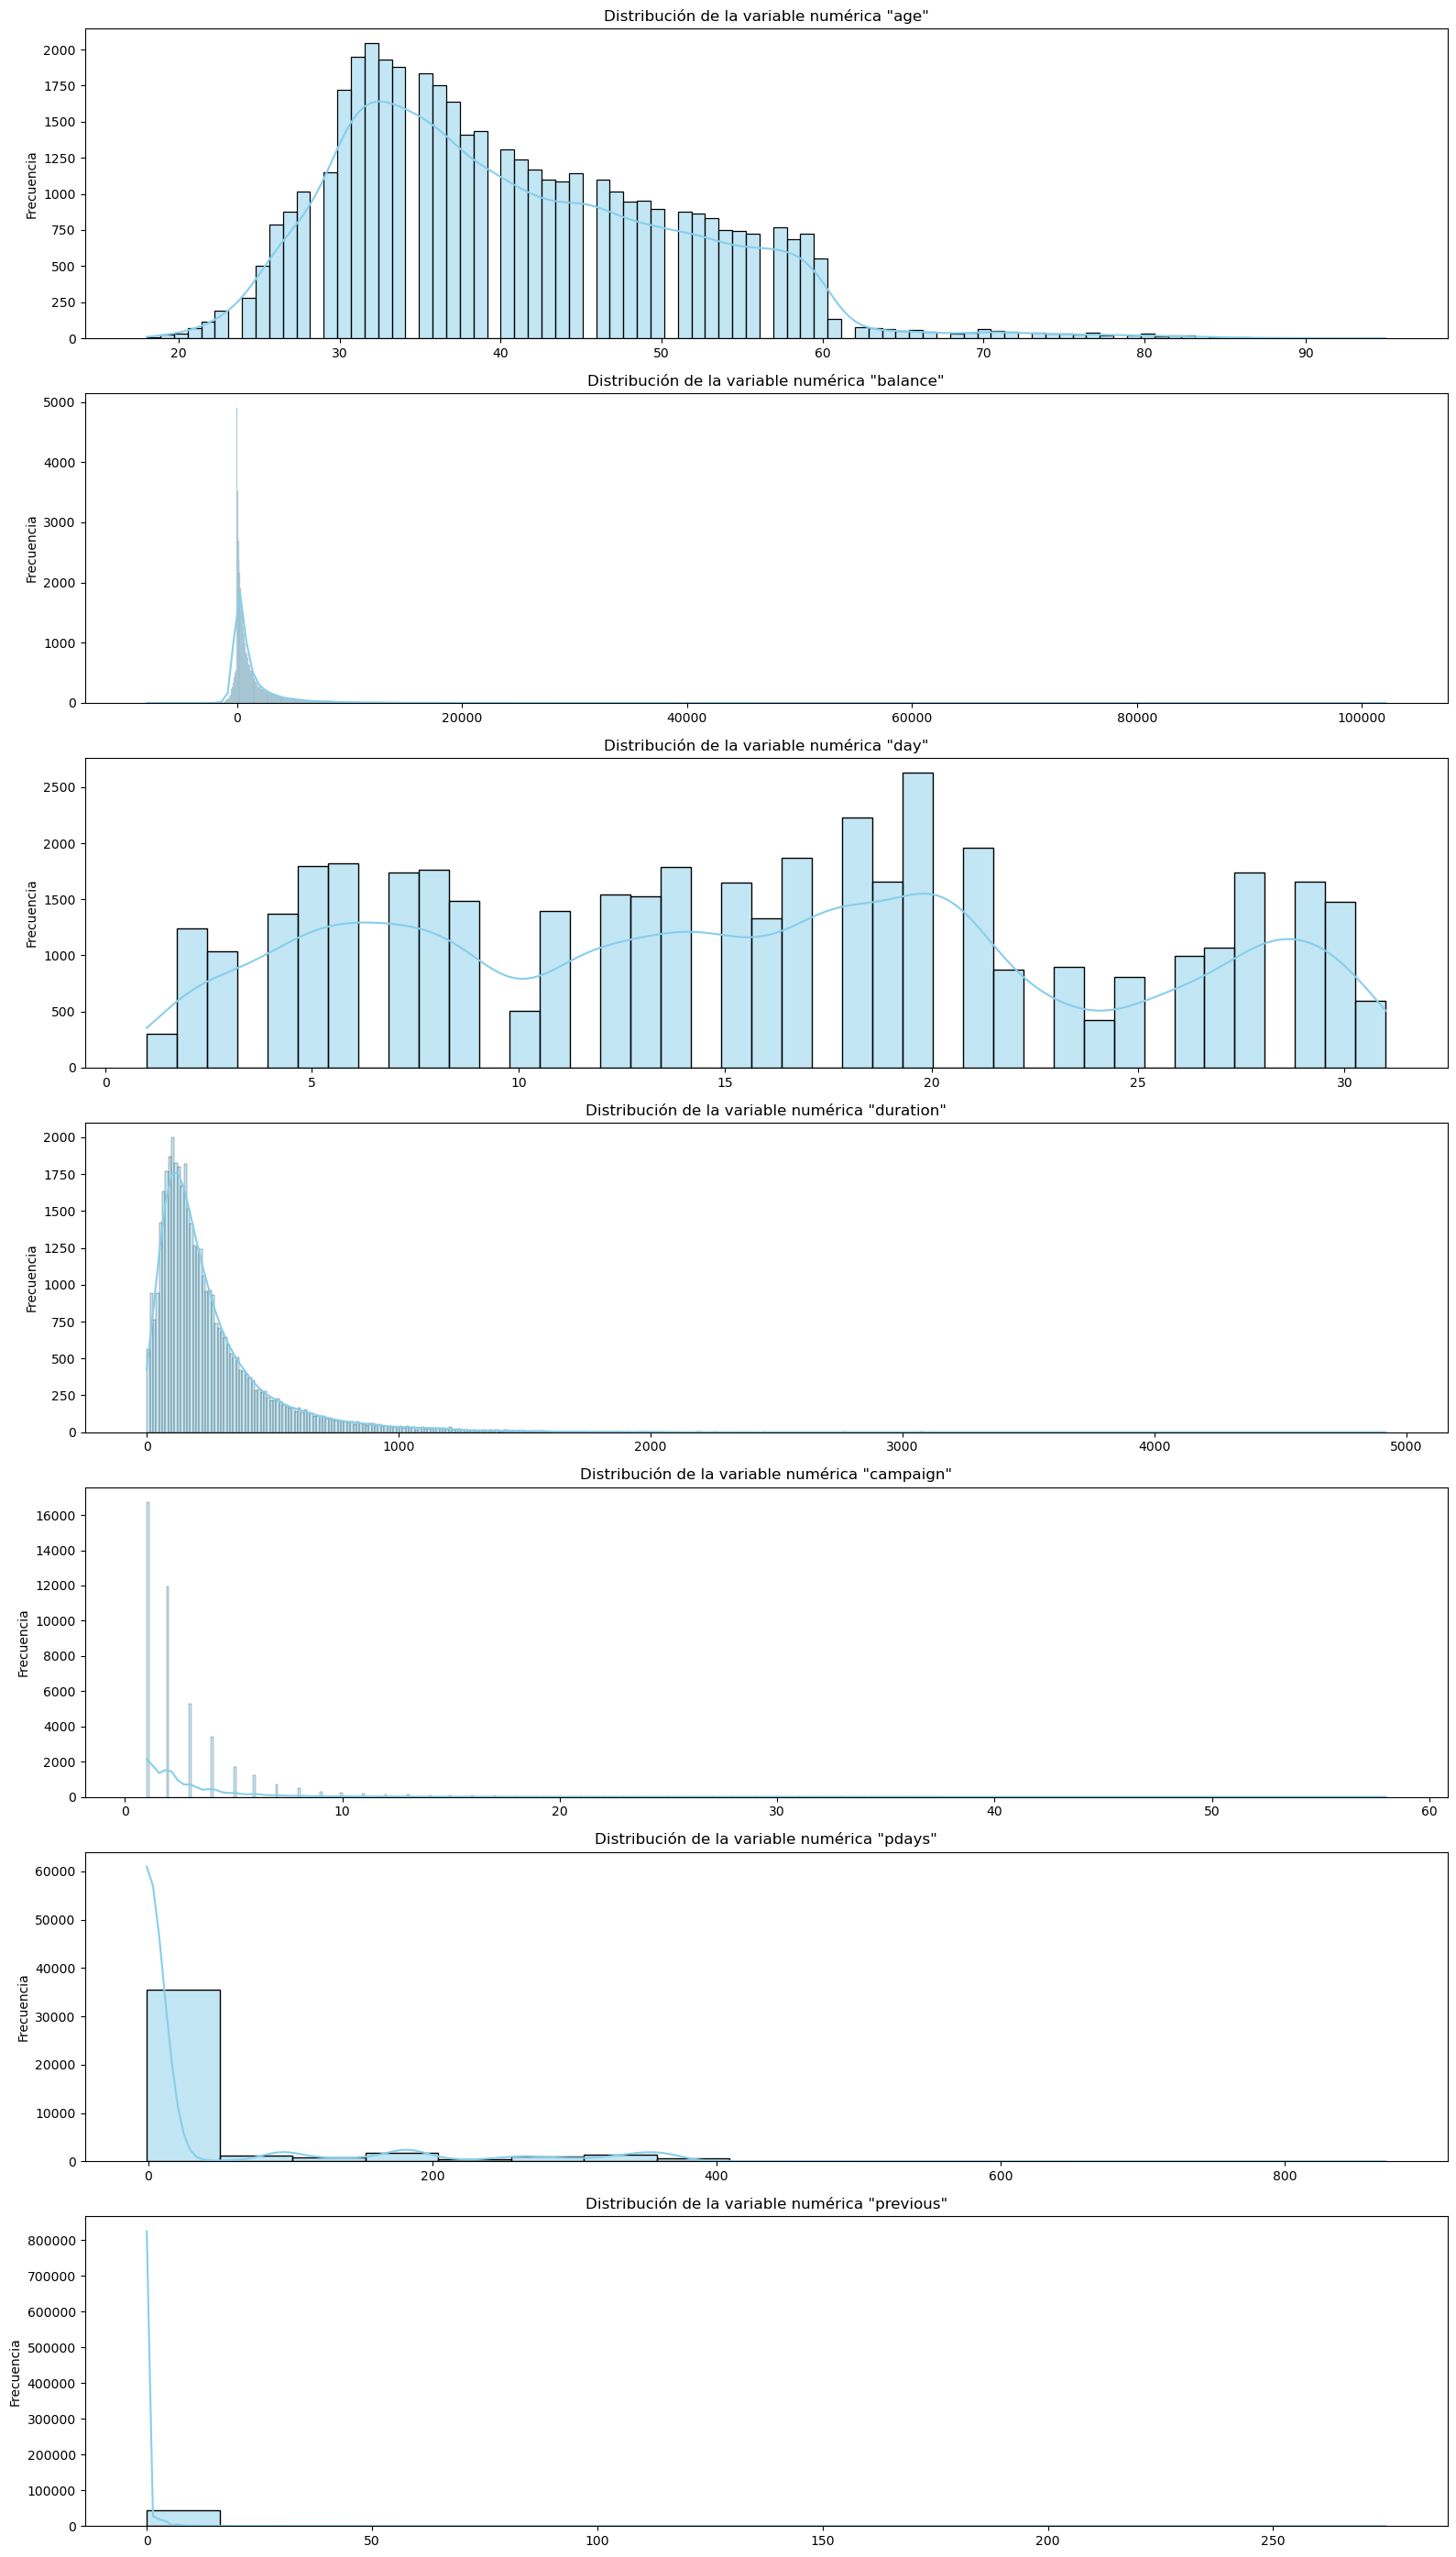

In [52]:
def plot_numerical_distributions(df):
    """
    Genera una visualización de la distribución de las variables numéricas
    en un DataFrame utilizando histogramas de Seaborn.
    """
    numerical_cols = df.select_dtypes(include=['number']).columns

    if len(numerical_cols) == 0:
        print("No se encontraron columnas numéricas en el DataFrame.")
        return

    plt.figure(figsize=(16, len(numerical_cols) * 4))

    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols), 1, i)
        sns.histplot(data=df, x=col, kde=True, color='skyblue')
        plt.title(f'Distribución de la variable numérica "{col}"')
        plt.xlabel('')
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

plot_numerical_distributions(df)

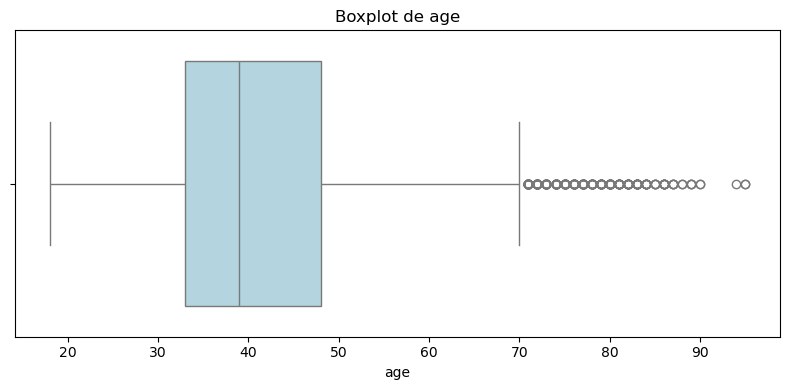

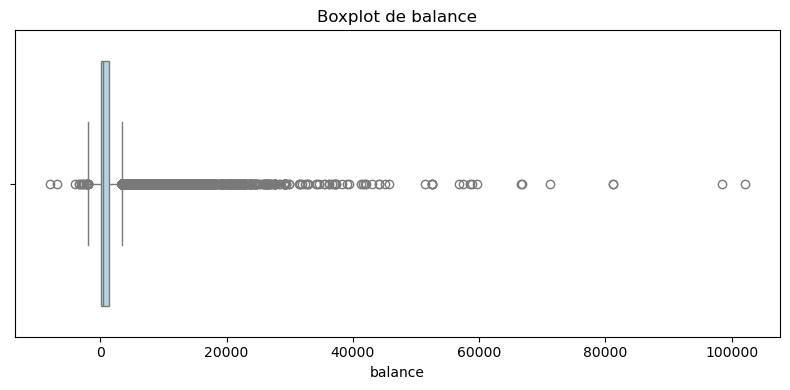

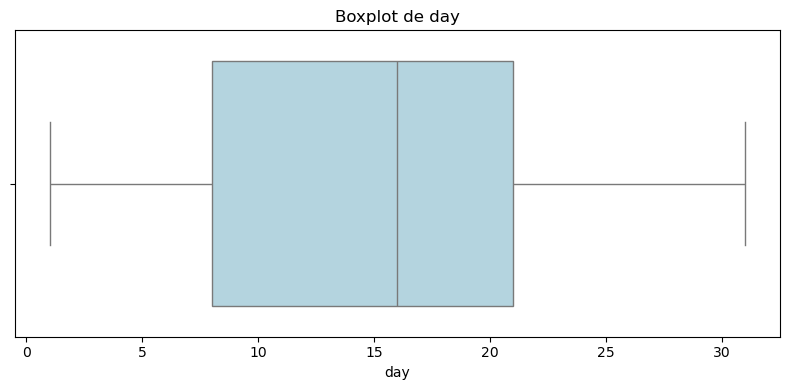

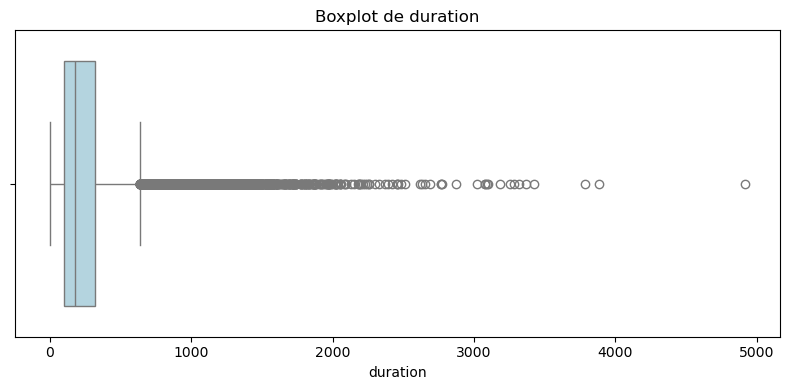

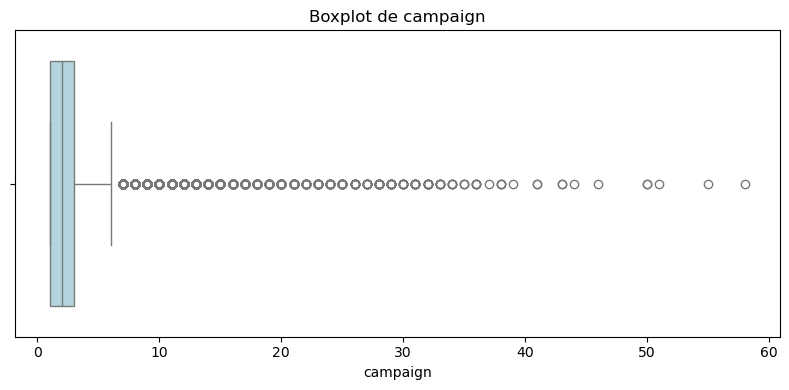

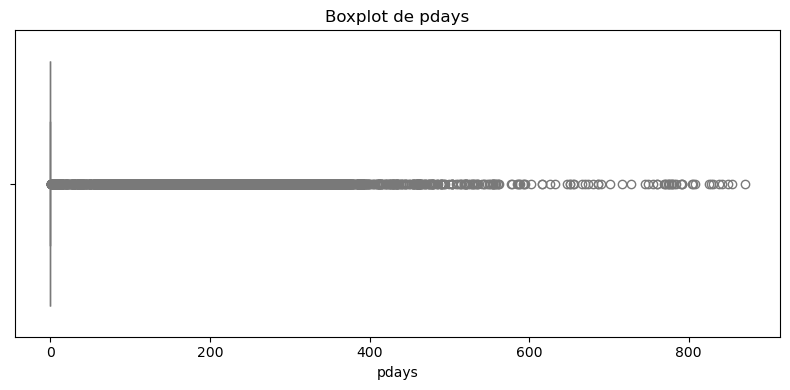

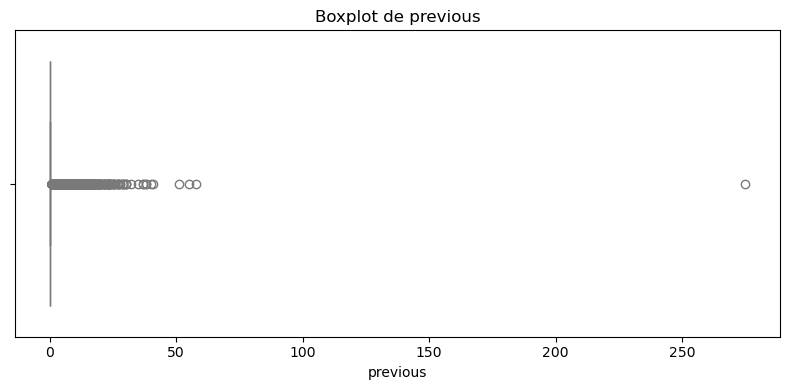

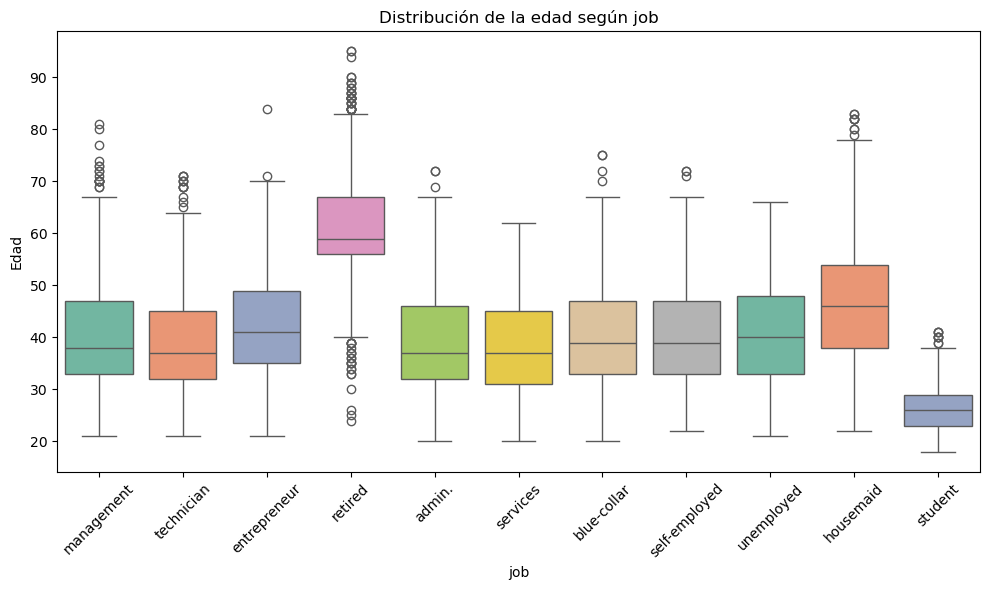

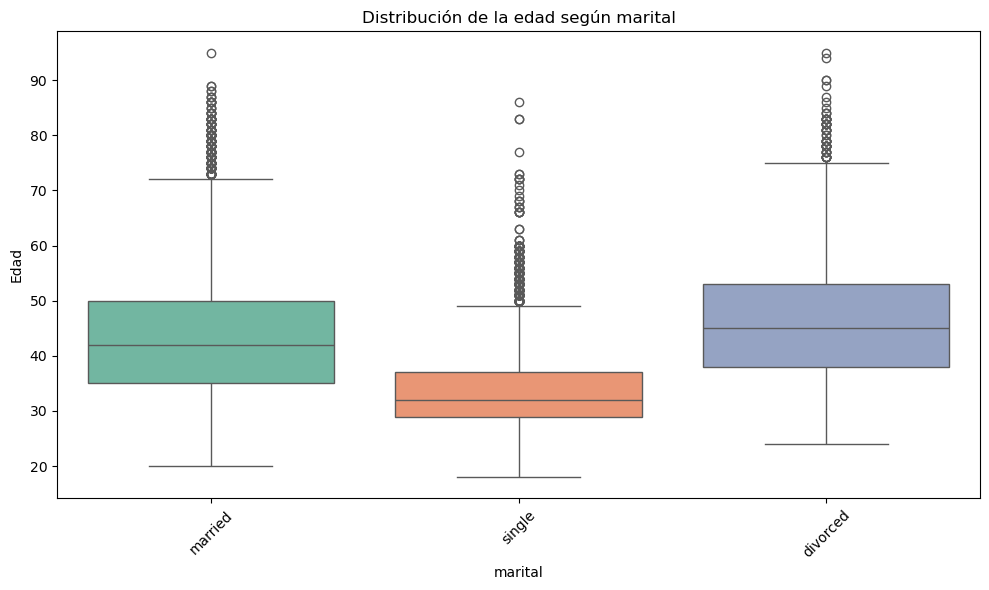

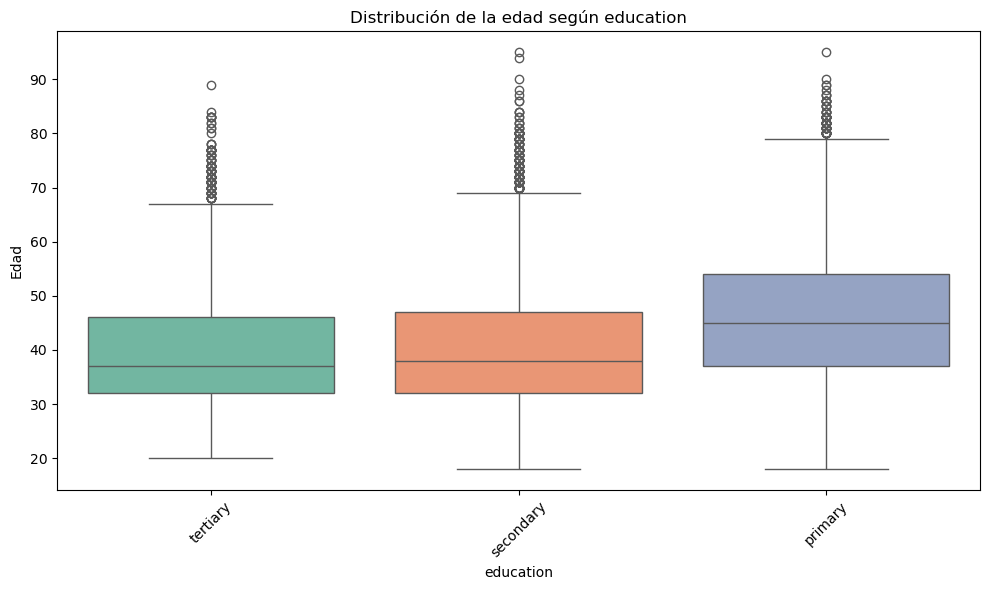

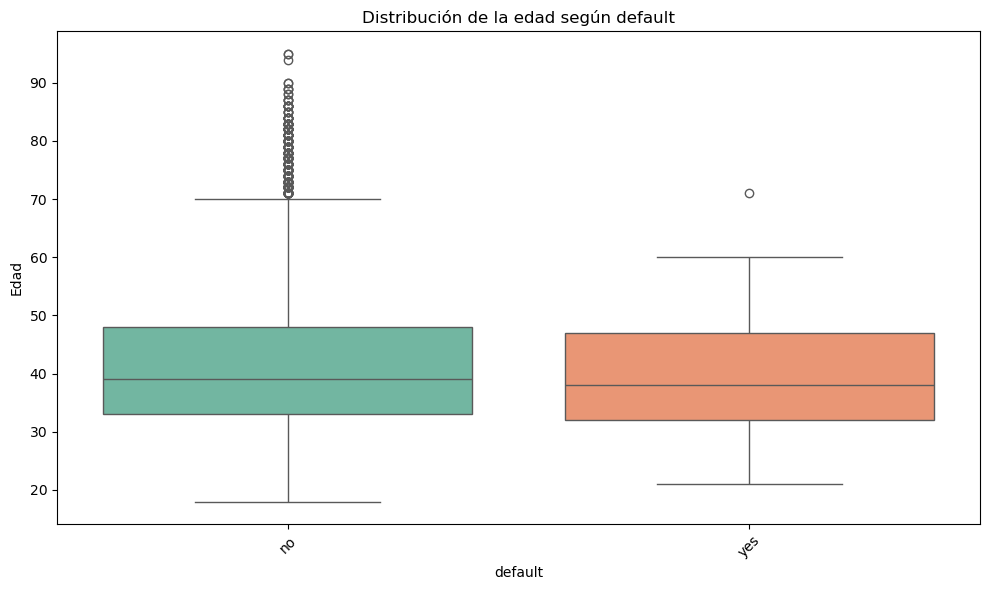

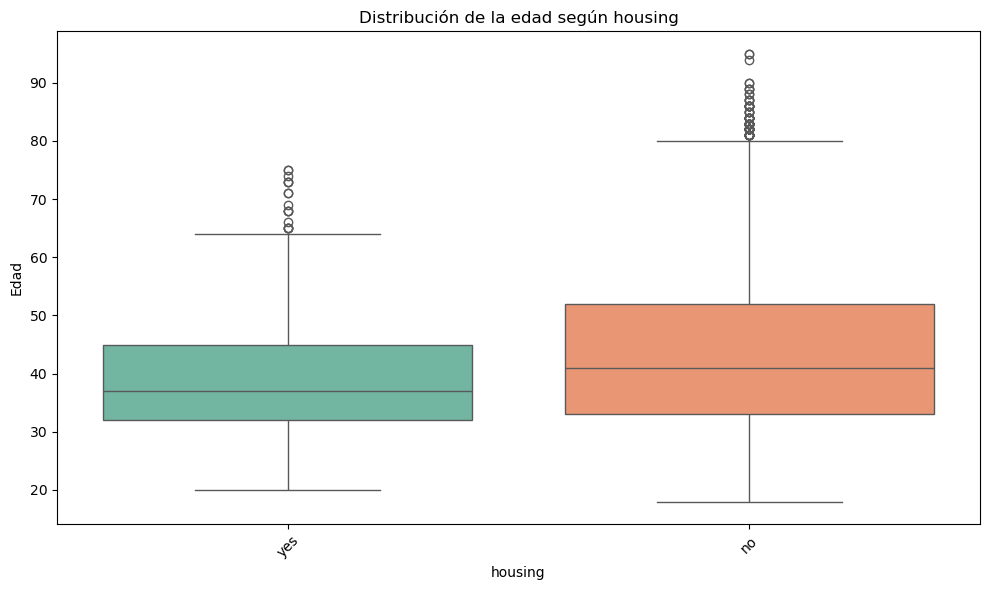

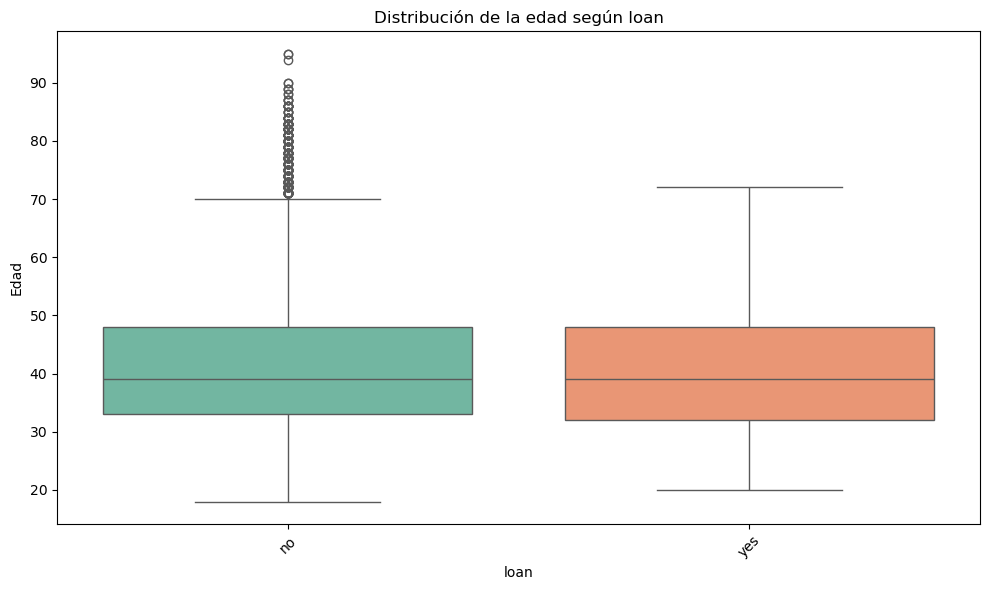

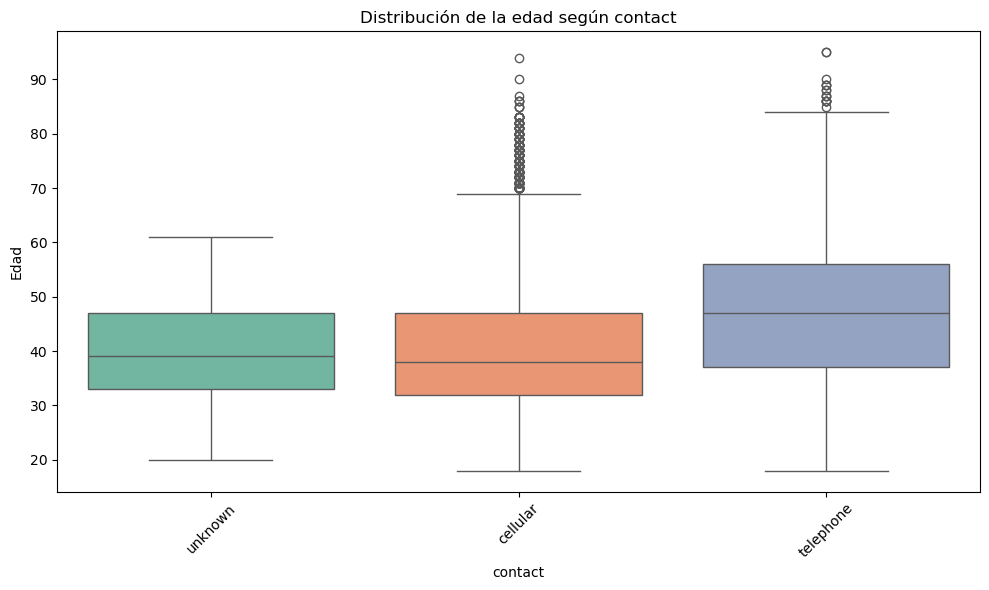

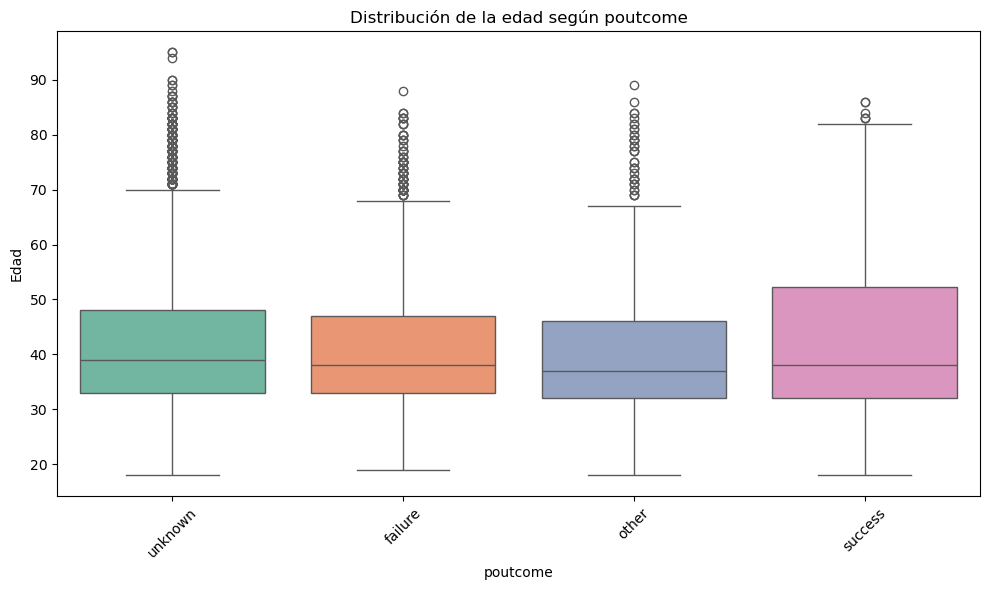

❌ La columna 'y' no está presente en el DataFrame. Saltando...


In [53]:
def plot_individual_boxplots(df):
    """
    Genera boxplots individuales:
    - Uno por cada variable numérica (distribución simple).
    - Uno por cada variable categórica cruzada con 'age' (distribución por grupo).
    """
    numerical_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'poutcome', 'y']

    # 1. Boxplots de variables numéricas
    if len(numerical_vars) == 0:
        print("No se encontraron columnas numéricas en el DataFrame.")
    else:
        for col in numerical_vars:
            if col in df.columns:
                plt.figure(figsize=(8, 4))
                sns.boxplot(x=df[col], color='lightblue')
                plt.title(f'Boxplot de {col}')
                plt.xlabel(col)
                plt.tight_layout()
                plt.show()
            else:
                print(f"❌ La columna '{col}' no está presente en el DataFrame. Saltando...")

    # 2. Boxplots cruzando categóricas con 'age'
    if 'age' not in df.columns:
        print("❌ La columna 'age' no está presente en el DataFrame. No se pueden graficar boxplots por grupo.")
        return

    if len(categorical_vars) == 0:
        print("No se encontraron columnas categóricas en el DataFrame.")
    else:
        for cat in categorical_vars:
            if cat not in df.columns:
                print(f"❌ La columna '{cat}' no está presente en el DataFrame. Saltando...")
                continue

            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=cat, y='age', hue=cat, palette='Set2')
            plt.title(f'Distribución de la edad según {cat}')
            plt.xlabel(cat)
            plt.ylabel('Edad')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


plot_individual_boxplots(df)


In [13]:
# Analizamos la relacion o el comportamiento que puede haber entre cada variable cuantitativa con la variable edad e
def plot_boxplot_with_y(df):
    """
    Genera boxplots individuales:
    - Uno por cada variable categórica cruzada con 'age' y la variable 'y'
    """
    categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan']
    
    if len(categorical_vars) == 0:
        print('No se encontraron columnas categóricas en el DataFrame')

    else:
        for cat in categorical_vars:
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df, x='y', y='age', hue=cat, palette='Set3')
            plt.title(f'Distribución de edad según y y segmentado por {cat}')
            plt.xlabel('y')
            plt.ylabel('Edad')
            plt.legend(title=cat, bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()

# plot_boxplot_with_y(df)

In [14]:
# Analizamos la correlación entre las variables cuantitativas
# Preparamos la variable para poder realizar la correlación
def corr_vars(df): 
    df_corr = df.copy()
    df_corr['fixed_term_deposit'] = df_corr['fixed_term_deposit'].map({'no': 0, 'yes': 1})
    num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'fixed_term_deposit']

    corr_matrix = df_corr[num_cols].corr()
    # Gráfico de barras horizontales
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=0.5)

    plt.title('Matriz de correlación entre variables numéricas y la variable objetivo (fixed_term_deposit)')
    plt.tight_layout()
    plt.show()

# corr_vars(df)

Obtenemos que no existe mucha correlación entre las variables con respecto a la variable 'fixed_term_deposit' --> ¿que pasa si separamos los valores de Si y analizamos como se comportan?

In [15]:
def yes_ftd(df):
    """ 
    Devuelve un nuevo DataFrame (df_fxt) con los registros de personas
    que aceptaron el depósito a plazo fijo (fixed_term_deposit == 'yes')
    """
    return df[df['fixed_term_deposit'] == 'yes']

df_yes_ftd =yes_ftd(df)
# display(df_yes_ftd)

In [16]:
def corr_matrix_yes_clients(df_yes):
    """
    Calcula y muestra la matriz de correlación de las variables numéricas
    para los clientes que aceptaron el depósito a plazo fijo.

    Parámetros:
    -----------
    df_yes : pd.DataFrame
        DataFrame filtrado con clientes que dijeron 'yes' en 'fixed_term_deposit'.
    """
    # Seleccionamos variables numéricas
    num_df = df_yes.select_dtypes(include='number')

    # Calculamos la matriz de correlación
    corr = num_df.corr()

    # Visualizamos con un heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
    plt.title("Matriz de correlación (clientes que aceptaron el depósito)")
    plt.tight_layout()
    plt.show()

# corr_matrix_yes_clients(df_yes_ftd)



¿Y las variables de las personas que no lo aceptaron?

In [17]:
def no_ftd(df):
    """ 
    Devuelve un nuevo DataFrame (df_fxt) con los registros de personas
    que no aceptaron el depósito a plazo fijo (fixed_term_deposit == 'no')
    """
    return df[df['fixed_term_deposit'] == 'no']

df_no_ftd =no_ftd(df)
# display(df_no_ftd)

In [18]:
def corr_matrix_no_clients(df_no):
    """
    Calcula y muestra la matriz de correlación de las variables numéricas
    para los clientes que NO aceptaron el depósito a plazo fijo.

    Parámetros:
    -----------
    df_no : pd.DataFrame
        DataFrame filtrado con clientes que dijeron 'no' en 'fixed_term_deposit'.
    """
    # Seleccionamos solo columnas numéricas
    num_df = df_no.select_dtypes(include='number')

    # Calculamos la matriz de correlación
    corr = num_df.corr()

    # Visualizamos la matriz como heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
    plt.title("Matriz de correlación (clientes que NO aceptaron el depósito)")
    plt.tight_layout()
    plt.show()

# corr_matrix_no_clients(df_no_ftd)


## Realizamos análisis sobre como se comportan las variables tanto para los valores de la variable: fixed_term_deposit --> 'yes' y 'no'

In [19]:
def plot_columns(df):
    """
    Crea gráficos de barras para cada columna puesta en la lista .
    """

    columnas_a_graficar = ['age', 'job', 'marital', 'education', 'default',
                           'housing', 'loan', 'contact', 'day']
    for col in columnas_a_graficar:
        conteo = df[col].value_counts()
        plt.figure(figsize=(8, 4))
        conteo.plot(kind='bar')
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

# Uso:
# plot_columns(df_yes_ftd)

Para poder realizar un mayor analisis de la variable edad lo voy a agrupar por rangos de edad

In [20]:
# # Aplica la función y guarda el resultado en una nueva columna
# df['age_group'] = df['age'].apply(group_ages)
# df_yes_ftd['age_group'] = df['age'].apply(group_ages)
# df_no_ftd['age_group'] = df['age'].apply(group_ages)
# # display(df_no_ftd)

In [21]:
def plot_age_group(df, col):
    """
    Crea un gráfico de barras para una columna del DataFrame.
    """
    conteo = df[col].value_counts().sort_index()  # ordenamos los grupos si son tipo texto
    plt.figure(figsize=(8, 4))
    conteo.plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# plot_age_group(df_yes_ftd, 'age_group') # Para los que lo aceptaron
# plot_age_group(df_no_ftd, 'age_group') # Para los que no

In [22]:
def info_cualitative_vars(df, columns):

    """ 
    Genera la media, moda y mediana de las variables cualitativas
    """
    mean =df[columns].mean()
    median = df[columns].median()
    mode = df[columns].mode()[0]

    print(f'Estadísticos para {columns}')
    print(f'Media: {mean}')
    print(f'Mediana: {median}')
    print(f'Moda: {mode}')

# info_cualitative_vars(df_yes_ftd, 'age')
# info_cualitative_vars(df_no_ftd, 'age')

In [23]:
""" 
Se puede apreciar como la edad tanto de las personas que aceptan como las que rechazan el producto, a pesar de que hay un volumen mayor de personas que han rechazo el producto.
"""

' \nSe puede apreciar como la edad tanto de las personas que aceptan como las que rechazan el producto, a pesar de que hay un volumen mayor de personas que han rechazo el producto.\n'

In [24]:
def frequency_vars (df, columns):
    """ 
    Función que muestra cual es el valor que más y menos se repite de una variable
    """
    frequency = df[columns].value_counts()
    most_frequent_value = frequency.idxmax()
    least_frequent_value = frequency.idxmin()

    print(f'El valor más usual: {most_frequent_value}')
    print(f'El valor que menos se repite: {least_frequent_value}')

# frequency_vars(df_yes_ftd, ['job', 'marital', 'education_level', 'month', 'loan', 'default'])
# frequency_vars(df_no_ftd, ['job', 'marital', 'education', 'month', 'loan', 'default'])

In [25]:
""" 
A nivel de cantidad
Vemos que los valores más frecuentes a la hora de aceptar los depósitos a plazo fijo has sido los managers 
(personas que trabajan en puestos de gestión o dirección), personas casadas, con niveles altos de estudios, en el mes de agosto, sin préstamos bancarios
ni préstamos en mora, mientras el perfil que menos ha aceptado el producto son desempleados, solteros, con estudios secundarios y sin préstamos en mora ni bancarios
"""

' \nA nivel de cantidad\nVemos que los valores más frecuentes a la hora de aceptar los depósitos a plazo fijo has sido los managers \n(personas que trabajan en puestos de gestión o dirección), personas casadas, con niveles altos de estudios, en el mes de agosto, sin préstamos bancarios\nni préstamos en mora, mientras el perfil que menos ha aceptado el producto son desempleados, solteros, con estudios secundarios y sin préstamos en mora ni bancarios\n'

In [26]:
def ratio_vars(df, columns):
    """
    Devuelve los valores más y menos frecuentes de múltiples columnas categóricas.
    """
    result = {}
    for col in columns:
        ratios = (df[col].value_counts(normalize= True) * 100).round(2).sort_values(ascending= False)
        print(f'Las proporciones de la variable {col} son: ')
        display(ratios)
        most_frequent_ratio = ratios.idxmax()
        print(f'El ratio más alto es para: {most_frequent_ratio}')
        least_frequent_ratio = ratios.idxmin()
        print(f'El ratio más bajo es para {least_frequent_ratio}')
       
        result[col] = {
            'most_frequent': most_frequent_ratio,
            'least_frequent': least_frequent_ratio
        }
columns = ['job', 'marital', 'education_level', 'month', 'loan', 'default']
# ratio_vars(df_yes_ftd, columns)

In [ ]:
""" 
Esto nos confirma lo dicho perviamente, de cuales son los grupos de perosnas con un mayor nivel de aceptación del producto: Vemos que los valores más frecuentes a la hora de aceptar
los depósitos a plazo fijo has sido los managers (personas que trabajan en puestos de gestión o dirección), personas casadas, con niveles altos de estudios, en el mes de agosto, 
sin préstamos bancarios ni préstamos en mora, 
"""

' \nEsto nos confirma lo dicho perviamente, de cuales son los grupos de perosnas con un mayor nivel de aceptación del producto: Vemos que los valores más frecuentes a la hora de aceptar\nlos depósitos a plazo fijo has sido los managers (personas que trabajan en puestos de gestión o dirección), personas casadas, con niveles altos de estudios, en el mes de agosto, \nsin préstamos bancarios ni préstamos en mora, \n'

: 

: 

: 

: 

: 

: 

In [27]:
def acceptance_rate_multiple(df, columnas):
    """
    Calcula y muestra el porcentaje de aceptación del producto financiero ('yes')
    en función de sí mismo, nos dice, dentro de una variable, en cada categoría
    dentro de esta, cual es la proporción de aceptación.
    """
    for columna in columnas:
        print(f"\n Porcentaje de aceptación por: {columna.upper()}")

        result = {}

        categories = df[columna].unique()

        for category in categories:
            subset = df[df[columna] == category]
            values = subset['fixed_term_deposit'].value_counts()
            if 'yes' in values:
                percent = (values['yes'] / values.sum()) * 100
            else:
                percent = 0
            result[category] = round(percent, 2)

        result_df = pd.DataFrame.from_dict(result, orient='index', columns=['% aceptación'])
        result_df = result_df.sort_values(by='% aceptación', ascending=False)
        result_df.reset_index(inplace=True)
        result_df.rename(columns={'index': columna}, inplace=True)

        # Mostrar tabla
        display(result_df)

        # Crear gráfico
        plt.figure(figsize=(10, 5))
        sns.barplot(data=result_df, x=columna, y='% aceptación', edgecolor='black', palette='Blues')
        plt.title(f'Porcentaje de aceptación por {columna}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

columns = ['job', 'marital', 'education_level', 'month', 'loan', 'default']
# acceptance_rate_multiple(df, columns)

# columns = ['job', 'marital', 'education_level', 'month', 'loan', 'default']
# results = def acceptance_rate_multiple(df, columnas):
# plot_aceptation(resultados)       

In [28]:
""" 
Nos da una perspectiva más profunda dentro de cada grupo, para cada categoría de cada uno de ellos, en función del número de personas a la que se le ha ofrecido 
el producto dentro de cada grupo, que porcentaje con respecto al total de su categoría ha aceptado o no. --> nos sirve porque al no tener la misma cantidad de 
personas en cada grupo, podemos ver el nivel de aceptación real por grupo y categoría.
"""

' \nNos da una perspectiva más profunda dentro de cada grupo, para cada categoría de cada uno de ellos, en función del número de personas a la que se le ha ofrecido \nel producto dentro de cada grupo, que porcentaje con respecto al total de su categoría ha aceptado o no. --> nos sirve porque al no tener la misma cantidad de \npersonas en cada grupo, podemos ver el nivel de aceptación real por grupo y categoría.\n'

In [29]:
def plot_job_education_gorup(df):
    
    """ 
    Genera un gráfico de barras que muestra la distribución de grupos de edad
    por tipo de trabajo y nivel educativo.
    """

    situation_group = df.groupby(['job', 'education_level'])['age_group'].value_counts().sort_values(ascending= False)
    situation_group = situation_group.reset_index(name= 'count')
    
    
    plt.figure(figsize=(16, 6))
    sns.barplot(
        data=situation_group,
        x='age_group',
        y='count',
        hue='job',
        dodge=True,
        errorbar=None,
        edgecolor='black',   
        width=0.8             
    )
    plt.title('Distribución de grupos de edad por tipo de trabajo')
    plt.xlabel('Grupo de edad')
    plt.ylabel('Cantidad')
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.tight_layout()
    plt.show()

# plot_job_education_gorup(df_yes_ftd)
# plot_job_education_gorup(df_no_ftd)

In [49]:
columns_job = ['job']
#ratio_vars(df, columns_job)
total_retired =df[df['job'] == 'retired']['fixed_term_deposit'].value_counts()
percent_yes_retired = ((total_retired['yes'] / total_retired.sum()) * 100).round(2)
print(f'EL producto fue aceptado por el {percent_yes_retired}% de jubilados')




EL producto fue aceptado por el 22.66% de jubilados


In [30]:
""" 
A través del primer gráfico se puede deducir que el público objetivo de la campaña debería ser las personas que se encuentran entre los 31 a 65 años de edad, personas que se intuyen que 
tienen una mayor estabilidad financiera y pueden querer aumentar sus ahorros en el futuro. Además se deduce indirectamente que los grupos de personas con mayor nivel de aceptación son 
aquellos con unos niveles de estudio superiores dado que los puestos que destacan en el gráfico conllevan una mayor cualificación como management, technician, admin, blue-collar... 
Mientras que los desempleados, emprendedores, estudiantes y amas de casa no son propensos a aceptar dicho producto.
Además se debe de tener en cuenta dentro de las personas mayores de 66 años a los retirados, que ha pesar de formar tan solo el 4.97% de la población total de la campaña, forman el 9.68% del
total de personas que aceptaron el producto y la mayor categoría dentro de su rango de edad, siendo un sector en el que se debería enofcar también.
"""

' \nA través del primer gráfico se puede deducir que el público objetivo de la campaña debería ser las personas que se encuentran entre los 31 a 65 años de edad, personas que se intuyen que \ntienen una mayor estabilidad financiera y pueden querer aumentar sus ahorros en el futuro. Además se deduce indirectamente que los grupos de personas con mayor nivel de aceptación son \naquellos con unos niveles de estudio superiores dado que los puestos que destacan en el gráfico conllevan una mayor cualificación como management, technician, admin, blue-collar... \nMientras que los desempleados, emprendedores, estudiantes y amas de casa no son propensos a aceptar dicho producto.\nAdemás se debe de tener en cuenta dentro de las personas mayores de 66 años a los retirados, que ha pesar de formar tan solo el 4.97% de la población total de la campaña, forman el 9.68% del\ntotal de personas que aceptaron el producto y la mayor categoría dentro de su rango de edad, siendo un sector en el que se debería

In [31]:
def plot_average_balance_by_job(df):
    """
    Genera un gráfico de barras con el balance promedio por tipo de trabajo.
    """
    plot_job_balance = df.groupby('job')['balance'].mean().sort_values(ascending=False)
    print(f'🔺El grupo con mayor renta media es: {plot_job_balance.idxmax()}')
    print(f'🔻El grupo con menor renta media es: {plot_job_balance.idxmin()}')    
    print(plot_job_balance.head())

    plt.figure(figsize=(10, 6))
    plot_job_balance.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title('Balance promedio por tipo de trabajo')
    plt.ylabel('Balance promedio (€)')
    plt.xlabel('Tipo de trabajo')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# plot_average_balance_by_job(df_yes_ftd)
# plot_average_balance_by_job(df)
# plot_average_balance_by_job(df_no_ftd)


In [32]:
""" 
Con estas gráficas se refleja que el producto financiero ha sido aceptado por las personas que poseen un mayor poder adquisitivo dado que refleja la renta media del 
individuo que aceptó, que no y ambos, encontrandose los valores medios de renta más altos en el grupo de qeu si lo aceptaron, esto refleja una correlación positiva entre el balance promedio 
y la aceptación del producto financiero. Aunque ciertos trabajos tienen balances altos en general, su relación con la aceptación varía ligeramente. 
"""

' \nCon estas gráficas se refleja que el producto financiero ha sido aceptado por las personas que poseen un mayor poder adquisitivo dado que refleja la renta media del \nindividuo que aceptó, que no y ambos, encontrandose los valores medios de renta más altos en el grupo de qeu si lo aceptaron, esto refleja una correlación positiva entre el balance promedio \ny la aceptación del producto financiero. Aunque ciertos trabajos tienen balances altos en general, su relación con la aceptación varía ligeramente. \n'

In [33]:
def scatter_balance_by_job(df):
    """
    Crea un gráfico de dispersión entre edad y balance, coloreando por tipo de trabajo (u otra variable).
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='job', y='balance', hue='job') 
    plt.title('Relación entre trabajo y balance por tipo de trabajo')  
    plt.xlabel('Job')
    plt.ylabel('Balance (€)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# scatter_balance_by_job(df_yes_ftd)
# scatter_balance_by_job(df_no_ftd)

In [34]:
"""
Confirma que a pesar de contar el dataset con en algunos tipos de trabajo con una renta mayor en las personas que no aceptaron con respecto a las que si, 
en proporción como se ha reflejado previamente, el dataset con las personas que no aceptaron el producto cuenta con una mayor cantidad de estos con respecto a los que si aceptaron, por ello
al obtener las medias y ver como de dispersos se encuentran los datos nos confirma que hay un mayor nivel de aceptación del producto de ahorro para las personas con mayor renta.
"""

'\nConfirma que a pesar de contar el dataset con en algunos tipos de trabajo con una renta mayor en las personas que no aceptaron con respecto a las que si, \nen proporción como se ha reflejado previamente, el dataset con las personas que no aceptaron el producto cuenta con una mayor cantidad de estos con respecto a los que si aceptaron, por ello\nal obtener las medias y ver como de dispersos se encuentran los datos nos confirma que hay un mayor nivel de aceptación del producto de ahorro para las personas con mayor renta.\n'

In [35]:
"""
Con esto podemos intuir que el producto financiero debería enfocarse para personas con un rango de edad entre los 31 a 65 años, tanto solteros como casados con unos niveles de estudio
medio - altos, unos niveles de renta igual o mayor a 1500€, dedicandose a trabajos que conlleven una mayor formación o responsabilidad, que no cuenten con prestamos bancarios ni en mora.
Además por el ratio de aceptación se debería teener en cuenta a estudiantes y jubilados con ingresos altos
"""

'\nCon esto podemos intuir que el producto financiero debería enfocarse para personas con un rango de edad entre los 31 a 65 años, tanto solteros como casados con unos niveles de estudio\nmedio - altos, unos niveles de renta igual o mayor a 1500€, dedicandose a trabajos que conlleven una mayor formación o responsabilidad, que no cuenten con prestamos bancarios ni en mora.\nAdemás por el ratio de aceptación se debería teener en cuenta a estudiantes y jubilados con ingresos altos\n'

Contrastes de hipótesis a realizar
1. ¿El tipo de trabajo influye en la aceptación del producto?
2. ¿El nivel educativo influye en la aceptación?
2. ¿El nivel educativo influye en la aceptación?
4. ¿La edad media es diferente entre quienes aceptaron y quienes no?
5. ¿La duración de la llamada influye?
6. ¿Tiene mayor probabilidad de aceptar el depósito una persona jubilada (retired) que una desempleada (unemployed)?
7. ¿y una persona jubilada más que un estudiante?
8. ¿Tiene una mayor tasa de aceptación un casado con nivel de estudio medio que un soltero de nivel de estudios alto?
9. ¿Las personas que tienen préstamo personal (loan == 'yes') aceptan más o menos que quienes no?
10. ¿Las personas con hipoteca (housing == 'yes') tienen menor tasa de aceptación?



In [36]:
""" 
Primero he de comprobar la normalidad de las variables cuantitativas elegidas, en este caso age y balance
"""

' \nPrimero he de comprobar la normalidad de las variables cuantitativas elegidas, en este caso age y balance\n'

In [37]:
def normality_test(df, columns):
    """
    Aplica el test de normalidad (D’Agostino y Pearson) a  las columnas seleccionadas.
    Muestra el estadístico, p-valor y conclusión para cada una.
    """
    for col in columns:
        if df[col].dtype not in ['int64', 'float64']:
            print(f'{col} no es una variable númerica, no es válidad para el test de normalidad, se omite')
            continue
        
        stat, p = stats.normaltest(df[col])
        print(f'--Normalidad de la variable {col}--')
        print(f'Estadístico: {stat.round(2)}, p-valor: {p.round(4)}')

        if p > 0.05:
            print(f'✅ No se rechaza la hipótesis nula -> se comporta como una distribución normal')
        else: 
            print(f'❌ Se rechaza la hipótesis nula --> no se comporta como una normal')

# Por ejemplo, para evaluar solo 'age' y 'balance'
normality_test(df, ['age', 'balance'])



--Normalidad de la variable age--
Estadístico: 3015.05, p-valor: 0.0
❌ Se rechaza la hipótesis nula --> no se comporta como una normal
--Normalidad de la variable balance--
Estadístico: 61984.58, p-valor: 0.0
❌ Se rechaza la hipótesis nula --> no se comporta como una normal


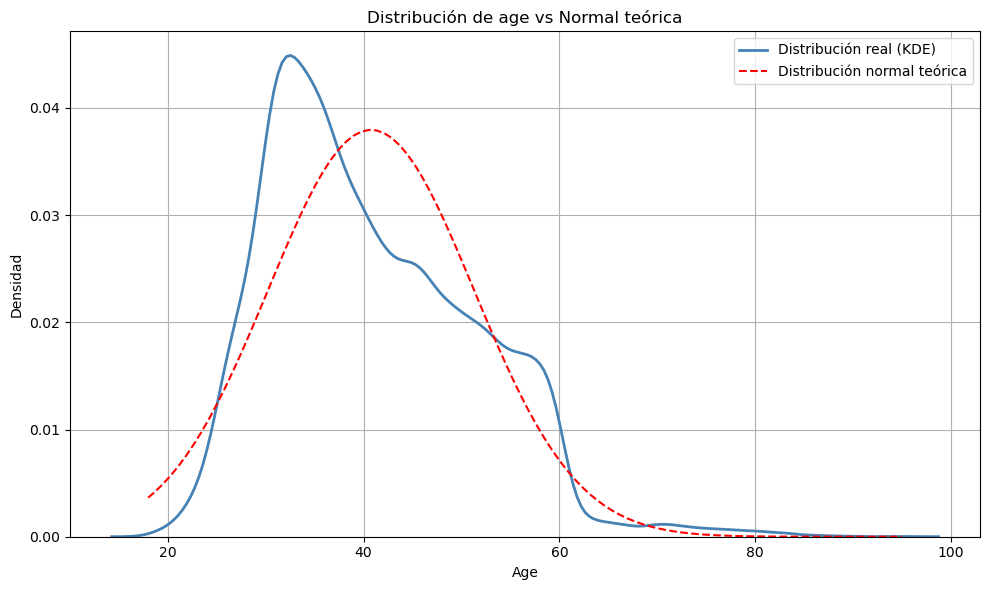

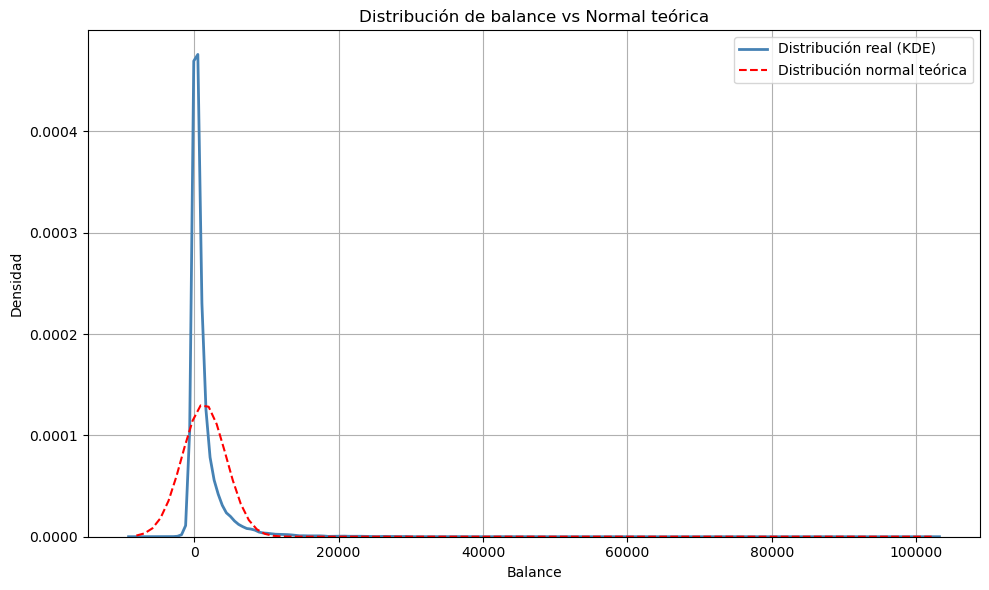

In [38]:
def plot_density(df, columns):
    """ 
    Gráfico que refleja la curva de densidad de las variables seleccionadas 
    """
    for column in columns:
        data = df[column]
        mean = data.mean()
        std = data.std()
        x_vals = np.linspace(data.min(), data.max(), 100)
        normal_curve = stats.norm.pdf(x_vals, loc=mean, scale=std)

        plt.figure(figsize=(10, 6))
        sns.kdeplot(data, label='Distribución real (KDE)', color='steelblue', linewidth=2)
        plt.plot(x_vals, normal_curve, label='Distribución normal teórica', color='red', linestyle='--')
        plt.title(f'Distribución de {column} vs Normal teórica')
        plt.xlabel(column.capitalize())
        plt.ylabel('Densidad')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_density(df, ['age', 'balance'])




--Normalidad de la variable age--
Estadístico: 2645.41, p-valor: 0.0
❌ Se rechaza la hipótesis nula --> no se comporta como una normal
--Normalidad de la variable balance--
Estadístico: 7593.28, p-valor: 0.0
❌ Se rechaza la hipótesis nula --> no se comporta como una normal


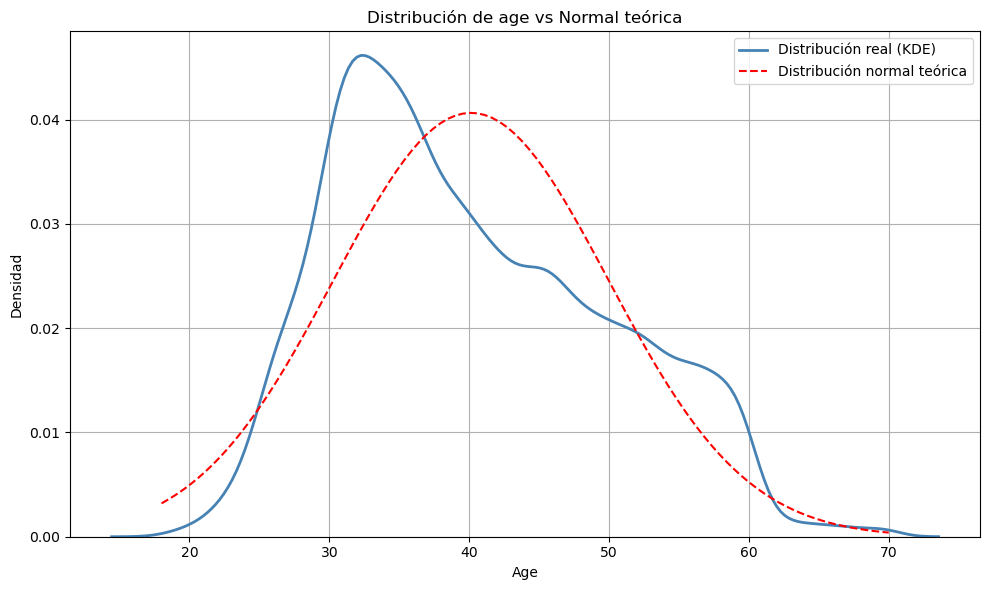

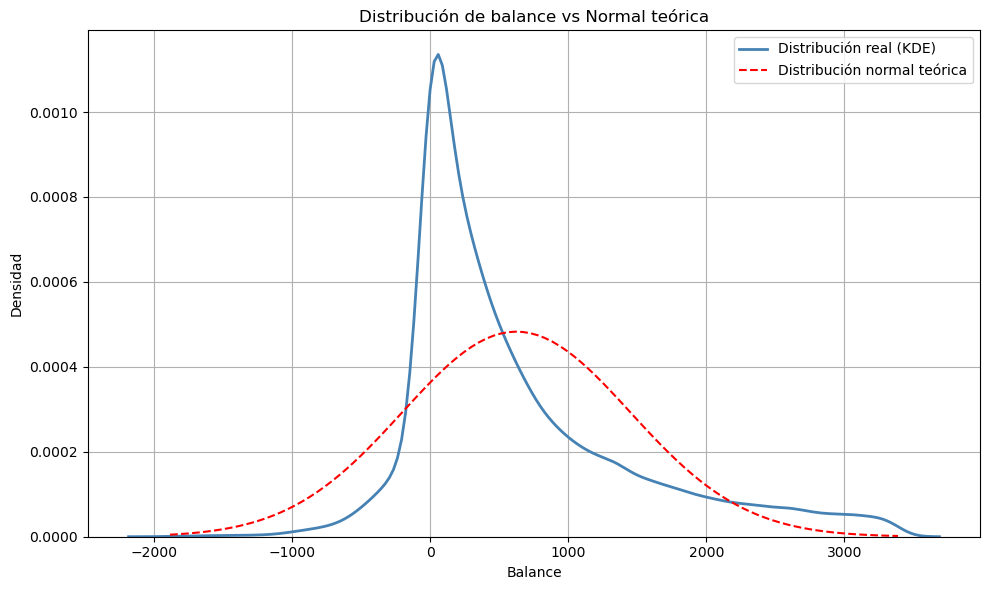

In [48]:
def remove_outliers(df, columns):
    """ 
    Función que se encarga de eliminar los valores atípicos de las columnas seleccionadas
    """

    for col in columns:
        q1= df[col].quantile(0.25)
        q3= df[col].quantile(0.75)
        iqr= q3 - q1

        lower = q1 - 1.5 * (iqr)
        upper = q3 + 1.5 * (iqr)
        df  = df[(df[col] >= lower) & (df[col] <= upper)]
    return df 

df_sin_outliers = remove_outliers(df, ['age', 'balance'])
normality_test(df_sin_outliers, ['age', 'balance'])
plot_density(df_sin_outliers, ['age', 'balance'])


Contrastes de hipótesis a realizar
1. ¿El tipo de trabajo influye en la aceptación del producto?✅
2. ¿El nivel educativo influye en la aceptación?✅
2. ¿El nivel educativo influye en la aceptación?✅
4. ¿La edad media es diferente entre quienes aceptaron y quienes no?✅ 
5. ¿La duración de la llamada influye? ✅ 
6. ¿Tiene mayor probabilidad de aceptar el depósito una persona jubilada (retired) que una desempleada (unemployed)?✅
7. ¿y una persona jubilada más que un estudiante?✅
8. ¿Tiene una mayor tasa de aceptación un casado con nivel de estudio medio que un soltero de nivel de estudios alto?
9. ¿Las personas que tienen préstamo personal (loan == 'yes') aceptan más o menos que quienes no?
10. ¿Las personas con hipoteca (housing == 'yes') tienen menor tasa de aceptación?

In [47]:
# 1. ¿El tipo de trabajo influye en la aceptación del producto? --> Al ser variables categóricas se debe usar el test de independencia de Chi - cuadrado
""" 
H0: las variables no están relacionadas 
H1: las variables están relacionadas
"""
def chi2_test_dependence(df, col1, col2):
    """ 
        Aplica el test de Chi-cuadrado para evaluar la independencia entre dos variables categóricas
    """
    table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f'--Test Chi-cuadrado entre {col1} y {col2}--')
    print(f'Estadísico X^2: {chi2.round(2)}')
    print(f'Grados de libertad: {dof}')
    print(f'valor p: {p.round(6)}')

    if p < 0.05:
        print(f'Se rechaza la hipótesis nula: hay evidencia de que las variables no son independientes \n ✅ Por ello, la variable {col1} sí influye en la aceptación del producto')
    else:
        print(f'Se acepta la hipótesis nula: hay evidencia suficiente para decir que están relacionadas \n ❌ Por ello, la variable {col1} no influye en la aceptación del producto')


chi2_test_dependence(df, 'job', 'fixed_term_deposit')
chi2_test_dependence(df, 'marital', 'fixed_term_deposit')
chi2_test_dependence(df, 'education', 'fixed_term_deposit')
chi2_test_dependence(df, 'default', 'fixed_term_deposit')
chi2_test_dependence(df, 'housing', 'fixed_term_deposit')
chi2_test_dependence(df, 'contact', 'fixed_term_deposit')


--Test Chi-cuadrado entre job y fixed_term_deposit--
Estadísico X^2: 772.49
Grados de libertad: 10
valor p: 0.0
Se rechaza la hipótesis nula: hay evidencia de que las variables no son independientes 
 ✅ Por ello, la variable job sí influye en la aceptación del producto
--Test Chi-cuadrado entre marital y fixed_term_deposit--
Estadísico X^2: 191.58
Grados de libertad: 2
valor p: 0.0
Se rechaza la hipótesis nula: hay evidencia de que las variables no son independientes 
 ✅ Por ello, la variable marital sí influye en la aceptación del producto
--Test Chi-cuadrado entre education y fixed_term_deposit--
Estadísico X^2: 233.4
Grados de libertad: 2
valor p: 0.0
Se rechaza la hipótesis nula: hay evidencia de que las variables no son independientes 
 ✅ Por ello, la variable education sí influye en la aceptación del producto
--Test Chi-cuadrado entre default y fixed_term_deposit--
Estadísico X^2: 22.79
Grados de libertad: 1
valor p: 2e-06
Se rechaza la hipótesis nula: hay evidencia de que las va

In [46]:
# ¿La edad media es mayor para quienes aceptaron con respecto a los que no?
""" 
H0: la edad media de quienes aceptaron es menor de los que no
H1: la edad media de quienes aceptaron es mayor de quienes no
"""

def t_test_mean_high(df, variable):
    """ 
     Compara si la media de 'variable' es mayor en quienes aceptaron el producto ('yes')
    frente a quienes no ('no'), usando un test t unilateral
    """
    yes = df[df['fixed_term_deposit'] == 'yes'][variable]
    no = df[df['fixed_term_deposit'] == 'no'][variable]

    t, p_dos_colas = stats.ttest_ind(yes, no, equal_var= False)
    p =p_dos_colas / 2 if t > 0 else 1 - (p_dos_colas / 2)  
    print(f'¿La media de {variable} es mayor de quienes aceptaron?')
    print(f'Estadístico t: {t.round(2)} | p-valor: {p.round(4)}')

    if p < 0.05:
        print(f'✅ Se rechaza la Hipótesis nula, a un nivel de significación del 5% podemos indicar que la media de {variable} es mayor en el grupo que aceptó')
    else:
        print('❌ No se puede rechazar la Hipótesis nula, la edad media es igual o similar a quienes no aceptaron')


t_test_mean_high(df, 'age')


¿La media de age es mayor de quienes aceptaron?
Estadístico t: 4.17 | p-valor: 0.0
✅ Se rechaza la Hipótesis nula, a un nivel de significación del 5% podemos indicar que la media de age es mayor en el grupo que aceptó


In [45]:
# ¿La duración de la llamada influye?
""" 
H0: La media de duración de la  llamada es igual en los grupos que aceptaron y los que no.
H1: La media de duración de la llamada es diferente entre los que aceptaron y los que no.
"""

def t_test_vars(df, variable):

    """ 
    A través del estadístico de t test compara si la variable influye o no en la aceptación del producto
    """

    yes = df[df['fixed_term_deposit'] == 'yes'][variable]
    no = df[df['fixed_term_deposit'] == 'no'][variable]

    stat_var, p = stats.ttest_ind(yes, no, equal_var=False)

    print(f'Test t para ver si la variable {variable} influye la aceptación del producto financierp')
    print(f'Estadístico t: {stat_var.round(3)}')
    print(f'Valor p: {p.round(4)}')

    if p < 0.05:
        print('✅ Se rechaza H₀: La duración de la llamada es significativamente diferente entre quienes aceptaron y quienes no.')
    else:
        print('❌ No se puede rechazar H₀: No hay evidencia de diferencia en duración entre los grupos.')

t_test_vars(df, 'duration')

Test t para ver si la variable duration influye la aceptación del producto financierp
Estadístico t: 56.323
Valor p: 0.0
✅ Se rechaza H₀: La duración de la llamada es significativamente diferente entre quienes aceptaron y quienes no.


In [44]:
# ¿Tiene mayor probabilidad de aceptar el depósito una persona jubilada (retired) que una desempleada (unemployed)?

""" 
H0: (nula): La proporción de aceptación es menor o igual en jubilados que en desempleados.
H1: La proporción de aceptación es mayor en jubilados que en desempleados.
"""

def t_test_compare_vars(df, column, group_1, group_2):

    """ 
    Compara si la proporción de aceptación del producto financiero (target) es mayor 
    en la categoría A que en la categoría B de una variable categórica (group_col) 
    mediante un test de proporciones Z.
    """

    g1 = df[df[column] == group_1]
    g2 = df[df[column] == group_2]

    yes_g1 = len(g1[g1['fixed_term_deposit'] == 'yes'])
    yes_g2 = len(g2[g2['fixed_term_deposit'] == 'yes'])

    total_g1 = len(g1)
    total_g2 = len(g2)

    z, p = proportions_ztest(count=[yes_g1, yes_g2], nobs=[total_g1, total_g2], alternative='larger')

    print(f"---¿{group_1} acepta más que {group_2} para la variable {column}?---")
    print(f"z: {z.round(2)} | p-valor: {p.round(4)}") 

    if p < 0.05:
        print(f"✅ Se rechaza H₀: los {group_1} tienen mayor probabilidad de aceptar el producto que {group_2}.")
    else:
        print(f"❌ No se rechaza H₀: no hay evidencia suficiente que indique que  acepten más los {group_1} que los {group_2}")

t_test_compare_vars(df, 'job', 'retired', 'unemployed')
t_test_compare_vars(df, 'job', 'management', 'technician')
t_test_compare_vars(df, 'job', 'student', 'unemployed')
t_test_compare_vars(df, 'job', 'blue-collar', 'services')
t_test_compare_vars(df, 'job', 'retired', 'student')
t_test_compare_vars(df, 'job', 'student', 'retired')
t_test_compare_vars(df, 'marital', 'single', 'married')
t_test_compare_vars(df, 'housing', 'no', 'yes')
t_test_compare_vars(df, 'loan', 'yes', 'no')



---¿retired acepta más que unemployed para la variable job?---
z: 5.03 | p-valor: 0.0
✅ Se rechaza H₀: los retired tienen mayor probabilidad de aceptar el producto que unemployed.
---¿management acepta más que technician para la variable job?---
z: 4.81 | p-valor: 0.0
✅ Se rechaza H₀: los management tienen mayor probabilidad de aceptar el producto que technician.
---¿student acepta más que unemployed para la variable job?---
z: 7.38 | p-valor: 0.0
✅ Se rechaza H₀: los student tienen mayor probabilidad de aceptar el producto que unemployed.
---¿blue-collar acepta más que services para la variable job?---
z: -2.91 | p-valor: 0.9982
❌ No se rechaza H₀: no hay evidencia suficiente que indique que  acepten más los blue-collar que los services
---¿retired acepta más que student para la variable job?---
z: -3.61 | p-valor: 0.9998
❌ No se rechaza H₀: no hay evidencia suficiente que indique que  acepten más los retired que los student
---¿student acepta más que retired para la variable job?---


In [43]:
# ¿Tiene una mayor tasa de aceptación un casado con nivel de estudio medio que un soltero de nivel de estudios alto?

""" 
H0: La tasa de aceptación del producto es igual o menor en casados con nivel medio de estudios que en solteros con nivel alto 
H1: La tasa de aceptación  del producto es mayor en casados con nivel medio que en solteros con nivel alto
"""

def test_compare_groups(df, col1, val1, col2, val2, col3, val3, col4, val4):
    """
    Compara si la tasa de aceptación del producto ('yes' en 'fixed_term_deposit')
    es mayor en un grupo A (col1=val1 y col2=val2) que en un grupo B (col3=val3 y col4=val4),
    usando un test de proporciones Z.

    Parámetros:
    -----------
    df : DataFrame
    col1, val1 : primera condición del grupo A
    col2, val2 : segunda condición del grupo A
    col3, val3 : primera condición del grupo B
    col4, val4 : segunda condición del grupo B
    """

    group_a = df[(df[col1] == val1) & (df[col2] == val2)]
    group_b = df[(df[col3] == val3) & (df[col4] == val4)]

    a_yes = (group_a['fixed_term_deposit'] == 'yes').sum()
    b_yes = (group_b['fixed_term_deposit'] == 'yes').sum()

    a_total = len(group_a)
    b_total =len(group_b)

    z, p = proportions_ztest([a_yes, b_yes], [a_total, b_total], alternative= 'larger')
    print(f"---Comparando:\n * A: {col1} = {val1}, {col2} = {val2}\n * B: {col3} = {val3}, {col4} = {val4}---")
    print(f"Z = {z.round(2)} | p = {p.round(4)}")

    if p < 0.05: 
        print(f'✅ Se rechaza la H0: El grupo {val1}, {val2} tiene una mayor probabilidad de aceptar que el grupo {val3}, {val4}')
    else:
        print(f'❌ Se acepta la H0: la aceptación del producto para el grupo {val1}, {val2} es igual o menor que para el grupo {val3}, {val4}')

test_compare_groups(df,
                    'marital', 'married',
                    'education_level', 'High School/VET',
                    'marital', 'single',
                    'education_level', 'Grade/Higher VET')

test_compare_groups(df, 
                    'marital', 'married', 
                    'education_level', 'High School/VET',
                    'marital', 'divorced',
                    'education_level', 'Primary'
                    )

test_compare_groups(df, 
                    'marital', 'divorced', 
                    'education_level', 'Primary',
                    'marital', 'married',
                    'education_level', 'High School/VET'
                    )

test_compare_groups(df, 
                    'marital', 'married', 
                    'education_level', 'Grade/Higher VET',
                    'marital', 'divorced',
                    'education_level', 'Grade/Higher VET'
                    )

test_compare_groups(df, 
                    'marital', 'married', 
                    'education_level', 'Grade/Higher VET',
                    'marital', 'divorced',
                    'education_level', 'Primary'
                    )

test_compare_groups(df, 
                    'marital', 'married', 
                    'education_level', 'Grade/Higher VET',
                    'marital', 'single',
                    'education_level', 'Primary'
                    )

test_compare_groups(df, 
                    'marital', 'married', 
                    'education_level', 'Grade/Higher VET',
                    'marital', 'married',
                    'education_level', 'Primary'
                    )
test_compare_groups(df, 
                    'marital', 'single', 
                    'education_level', 'Grade/Higher VET',
                    'marital', 'single',
                    'education_level', 'Primary'
                    )

---Comparando:
 * A: marital = married, education_level = High School/VET
 * B: marital = single, education_level = Grade/Higher VET---
Z = -16.43 | p = 1.0
❌ Se acepta la H0: la aceptación del producto para el grupo married, High School/VET es igual o menor que para el grupo single, Grade/Higher VET
---Comparando:
 * A: marital = married, education_level = High School/VET
 * B: marital = divorced, education_level = Primary---
Z = -4.0 | p = 1.0
❌ Se acepta la H0: la aceptación del producto para el grupo married, High School/VET es igual o menor que para el grupo divorced, Primary
---Comparando:
 * A: marital = divorced, education_level = Primary
 * B: marital = married, education_level = High School/VET---
Z = 4.0 | p = 0.0
✅ Se rechaza la H0: El grupo divorced, Primary tiene una mayor probabilidad de aceptar que el grupo married, High School/VET
---Comparando:
 * A: marital = married, education_level = Grade/Higher VET
 * B: marital = divorced, education_level = Grade/Higher VET---
Z

In [39]:
""" 
Nos muestra que por grupos de estado civil, en función de su nivel de estudios no hay mucha diferenciación de aceptación del producto entre un nivel superior de estudios
pero si hay diferencia entre los distintos estados civiles y el nivel de estuidos mayor y básico tanto entre ellos como para su mismo estado civil
"""

' \nNos muestra que por grupos de estado civil, en función de su nivel de estudios no hay mucha diferenciación de aceptación del producto entre un nivel superior de estudios\npero si hay diferencia entre los distintos estados civiles y el nivel de estuidos mayor y básico tanto entre ellos como para su mismo estado civil\n'

In [42]:
df.to_csv('../data/processed/Bank_FTD.csv', index= False)